# EDA PART 3

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

In [235]:
data = pd.read_csv('EDA_2.csv', sep=',')
data.head()

,Unnamed: 0,Unnamed: 0.1,DEPTH_MD,X_LOC,Y_LOC,GROUP,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,DRHO,LITHOLOGY,VSH,CLUSTER
0,0,922572,2724.702000,450313.93750,6795994.0,BAAT GP.,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,9.107889,83.988472,59.014019,-0.018337,Sandstone,0.089237,1
1,1,320996,2621.822805,454469.53125,6603730.0,ROGALAND GP.,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,4.117731,81.420059,59.014019,0.001239,Sandstone,0.054281,0
2,2,728745,2637.138000,437780.34375,6791573.5,BAAT GP.,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,6.058303,103.821838,61.254036,-0.059639,Sandstone,0.085962,1
3,3,582075,1992.700979,526935.68750,6758512.0,VIKING GP.,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,3.794930,104.682312,66.092003,-0.011558,Sandstone,0.068806,1
4,4,191006,2198.375197,466874.18750,6479870.5,VIKING GP.,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,6.058303,94.435440,39.258499,0.024615,Sandstone,0.245766,0


In [236]:
data = data.drop(['Unnamed: 0.1'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)

In [237]:
data.head()

,DEPTH_MD,X_LOC,Y_LOC,GROUP,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,DRHO,LITHOLOGY,VSH,CLUSTER
0,2724.702000,450313.93750,6795994.0,BAAT GP.,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,9.107889,83.988472,59.014019,-0.018337,Sandstone,0.089237,1
1,2621.822805,454469.53125,6603730.0,ROGALAND GP.,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,4.117731,81.420059,59.014019,0.001239,Sandstone,0.054281,0
2,2637.138000,437780.34375,6791573.5,BAAT GP.,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,6.058303,103.821838,61.254036,-0.059639,Sandstone,0.085962,1
3,1992.700979,526935.68750,6758512.0,VIKING GP.,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,3.794930,104.682312,66.092003,-0.011558,Sandstone,0.068806,1
4,2198.375197,466874.18750,6479870.5,VIKING GP.,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,6.058303,94.435440,39.258499,0.024615,Sandstone,0.245766,0


In [238]:
encoded_data = pd.get_dummies(data, columns = ['GROUP', 'CLUSTER'])
encoded_data.head()

,DEPTH_MD,X_LOC,Y_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,...,GROUP_NORDLAND GP.,GROUP_ROGALAND GP.,GROUP_ROTLIEGENDES GP.,GROUP_SHETLAND GP.,GROUP_TYNE GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.,GROUP_ZECHSTEIN GP.,CLUSTER_0,CLUSTER_1
0,2724.702000,450313.93750,6795994.0,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,...,0,0,0,0,0,0,0,0,0,1
1,2621.822805,454469.53125,6603730.0,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,...,0,1,0,0,0,0,0,0,1,0
2,2637.138000,437780.34375,6791573.5,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,...,0,0,0,0,0,0,0,0,0,1
3,1992.700979,526935.68750,6758512.0,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,...,0,0,0,0,0,0,1,0,0,1
4,2198.375197,466874.18750,6479870.5,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,...,0,0,0,0,0,0,1,0,1,0


In [239]:
encoded_data['Y'] = encoded_data["LITHOLOGY"]

In [240]:
encoded_data.head()

,DEPTH_MD,X_LOC,Y_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,...,GROUP_ROGALAND GP.,GROUP_ROTLIEGENDES GP.,GROUP_SHETLAND GP.,GROUP_TYNE GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.,GROUP_ZECHSTEIN GP.,CLUSTER_0,CLUSTER_1,Y
0,2724.702000,450313.93750,6795994.0,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,...,0,0,0,0,0,0,0,0,1,Sandstone
1,2621.822805,454469.53125,6603730.0,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,...,1,0,0,0,0,0,0,1,0,Sandstone
2,2637.138000,437780.34375,6791573.5,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,...,0,0,0,0,0,0,0,0,1,Sandstone
3,1992.700979,526935.68750,6758512.0,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,...,0,0,0,0,0,1,0,0,1,Sandstone
4,2198.375197,466874.18750,6479870.5,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,...,0,0,0,0,0,1,0,1,0,Sandstone


In [241]:
encoded_data = encoded_data.drop(['LITHOLOGY'], axis=1)

In [242]:
encoded_data.head()

,DEPTH_MD,X_LOC,Y_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,...,GROUP_ROGALAND GP.,GROUP_ROTLIEGENDES GP.,GROUP_SHETLAND GP.,GROUP_TYNE GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.,GROUP_ZECHSTEIN GP.,CLUSTER_0,CLUSTER_1,Y
0,2724.702000,450313.93750,6795994.0,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,...,0,0,0,0,0,0,0,0,1,Sandstone
1,2621.822805,454469.53125,6603730.0,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,...,1,0,0,0,0,0,0,1,0,Sandstone
2,2637.138000,437780.34375,6791573.5,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,...,0,0,0,0,0,0,0,0,1,Sandstone
3,1992.700979,526935.68750,6758512.0,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,...,0,0,0,0,0,1,0,0,1,Sandstone
4,2198.375197,466874.18750,6479870.5,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,...,0,0,0,0,0,1,0,1,0,Sandstone


In [243]:
encoded_data_1 = encoded_data.drop(['Y'], axis=1)

In [244]:
array = encoded_data.values

In [245]:
names = []
for col in encoded_data_1.columns:
    names.append(col)
    print(col)
#print(len(names))

DEPTH_MD
X_LOC
Y_LOC
CALI
RSHA
RMED
RDEP
RHOB
GR
NPHI
PEF
DTC
SP
DRHO
VSH
GROUP_BAAT GP.
GROUP_BOKNFJORD GP.
GROUP_CROMER KNOLL GP.
GROUP_DUNLIN GP.
GROUP_HEGRE GP.
GROUP_HORDALAND GP.
GROUP_NORDLAND GP.
GROUP_ROGALAND GP.
GROUP_ROTLIEGENDES GP.
GROUP_SHETLAND GP.
GROUP_TYNE GP.
GROUP_VESTLAND GP.
GROUP_VIKING GP.
GROUP_ZECHSTEIN GP.
CLUSTER_0
CLUSTER_1


In [246]:
X = array[:,0:31]
Y = array[:,31]

In [247]:
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)

In [248]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
score = fit.scores_
features = fit.transform(X)
# summarize selected features
#print(features[0:5,:])
print(score)

[6.459e+02 6.483e+02 3.558e+03 5.560e+02 9.066e+02 1.542e+02 2.623e+04
 2.365e+03 4.786e+03 3.829e+03 5.884e+02 1.600e+03 1.142e+02 9.907e+01
 2.387e+03 1.196e+03 7.047e+01 7.363e+02 4.393e+02 6.770e+01 3.677e+02
 7.282e+01 1.587e+02       inf 4.367e+03 5.747e-01 3.542e+02 6.548e+02
 5.389e+04 1.941e+03 1.941e+03]


c:\Users\GWISE EQUIPO 1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


C:\Users\GWISEE~1\AppData\Local\Temp/ipykernel_14864/3925535890.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total = data.sum(axis=1)


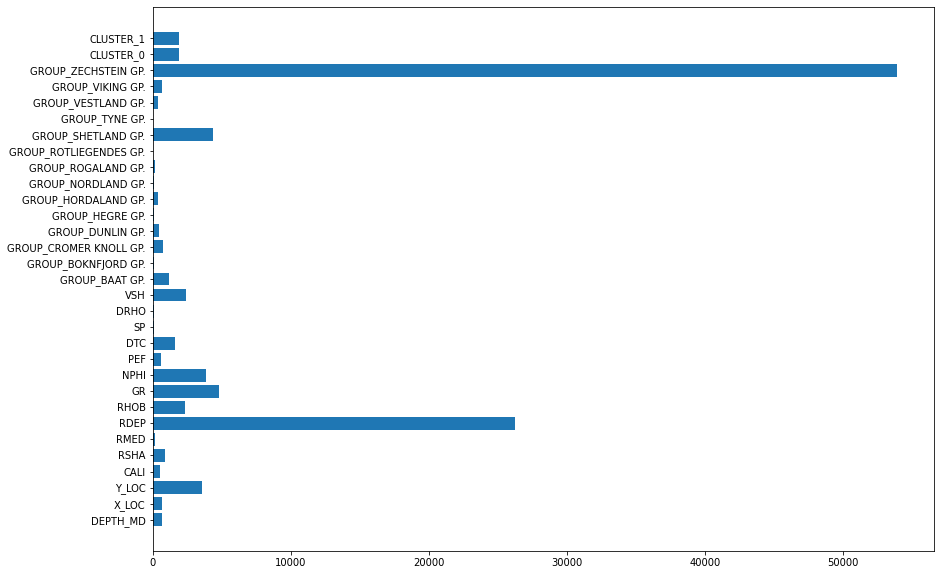

In [249]:
import pandas as pd 
import matplotlib.pyplot as plt

total = data.sum(axis=1)
plt.figure(figsize=(14,10))
plt.barh(names, score)
plt.show()

In [250]:
encoded_data_1.head()

,DEPTH_MD,X_LOC,Y_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,...,GROUP_NORDLAND GP.,GROUP_ROGALAND GP.,GROUP_ROTLIEGENDES GP.,GROUP_SHETLAND GP.,GROUP_TYNE GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.,GROUP_ZECHSTEIN GP.,CLUSTER_0,CLUSTER_1
0,2724.702000,450313.93750,6795994.0,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,...,0,0,0,0,0,0,0,0,0,1
1,2621.822805,454469.53125,6603730.0,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,...,0,1,0,0,0,0,0,0,1,0
2,2637.138000,437780.34375,6791573.5,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,...,0,0,0,0,0,0,0,0,0,1
3,1992.700979,526935.68750,6758512.0,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,...,0,0,0,0,0,0,1,0,0,1
4,2198.375197,466874.18750,6479870.5,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,...,0,0,0,0,0,0,1,0,1,0


In [251]:
univariate = encoded_data.drop(['GROUP_TYNE GP.','GROUP_ROTLIEGENDES GP.','GROUP_NORDLAND GP.','GROUP_HEGRE GP.','GROUP_BOKNFJORD GP.','DRHO'], axis=1)

In [252]:
univariate.head()

,DEPTH_MD,X_LOC,Y_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,...,GROUP_DUNLIN GP.,GROUP_HORDALAND GP.,GROUP_ROGALAND GP.,GROUP_SHETLAND GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.,GROUP_ZECHSTEIN GP.,CLUSTER_0,CLUSTER_1,Y
0,2724.702000,450313.93750,6795994.0,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,...,0,0,0,0,0,0,0,0,1,Sandstone
1,2621.822805,454469.53125,6603730.0,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,...,0,0,1,0,0,0,0,1,0,Sandstone
2,2637.138000,437780.34375,6791573.5,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,...,0,0,0,0,0,0,0,0,1,Sandstone
3,1992.700979,526935.68750,6758512.0,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,...,0,0,0,0,0,1,0,0,1,Sandstone
4,2198.375197,466874.18750,6479870.5,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,...,0,0,0,0,0,1,0,1,0,Sandstone


In [253]:
univariate.to_csv('univariate.csv')

In [255]:
X

array([[2724.702, 450313.9375, 6795994.0, ..., 0, 0, 1],
       [2621.8228051, 454469.53125, 6603730.0, ..., 0, 1, 0],
       [2637.138, 437780.34375, 6791573.5, ..., 0, 0, 1],
       ...,
       [3238.161016, 520153.1875, 6452287.5, ..., 1, 1, 0],
       [3238.313016, 520153.1875, 6452287.5, ..., 1, 1, 0],
       [3238.465016, 520153.1875, 6452287.5, ..., 1, 1, 0]], dtype=object)

# PCA

In [254]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=31)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
#print(fit.components_)

Explained Variance: [9.517e-01 4.823e-02 2.748e-05 7.086e-06 1.027e-06 9.371e-08 7.115e-08
 2.676e-08 9.463e-09 2.299e-10 6.221e-11 6.149e-12 4.337e-12 3.465e-12
 3.279e-12 2.521e-12 2.042e-12 1.370e-12 1.236e-12 8.067e-13 7.073e-13
 5.310e-13 3.772e-13 2.773e-13 1.566e-13 1.140e-13 3.883e-14 9.680e-15
 1.205e-15 8.507e-33 8.507e-33]


In [257]:
fit

PCA(n_components=31)

# PCA 2

In [258]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
# Load the data

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
features_pca = pca.fit_transform(X)
# Show results
#print("Original number of features:", X.shape[1])
#print("Reduced number of features:", features_pca.shape[1])
print(features_pca)

Original number of features: 31
Reduced number of features: 2
[[ 1.18   1.568]
 [-0.102  1.008]
 [ 1.144  1.93 ]
 ...
 [-1.08  -1.284]
 [-1.08  -1.284]
 [-1.08  -1.284]]


# FEATURE IMPORTANCE

In [32]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.071 0.063 0.091 0.047 0.029 0.032 0.082 0.057 0.061 0.046 0.027 0.05
 0.043 0.024 0.062 0.015 0.001 0.026 0.009 0.002 0.008 0.001 0.006 0.
 0.062 0.    0.005 0.012 0.029 0.018 0.023]


In [33]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38040 entries, 0 to 38039
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DEPTH_MD                38040 non-null  float64
 1   X_LOC                   38040 non-null  float64
 2   Y_LOC                   38040 non-null  float64
 3   CALI                    38040 non-null  float64
 4   RSHA                    38040 non-null  float64
 5   RMED                    38040 non-null  float64
 6   RDEP                    38040 non-null  float64
 7   RHOB                    38040 non-null  float64
 8   GR                      38040 non-null  float64
 9   NPHI                    38040 non-null  float64
 10  PEF                     38040 non-null  float64
 11  DTC                     38040 non-null  float64
 12  SP                      38040 non-null  float64
 13  DRHO                    38040 non-null  float64
 14  VSH                     38040 non-null

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
encoded_data = sc.fit_transform(encoded_data)

ValueError: could not convert string to float: 'Sandstone'

In [24]:
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])